In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn to calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

# gensim for text similarity
from gensim import similarities 
from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity, Similarity

# to build the corpus
from collections import defaultdict
from gensim import corpora, models

## Building the Corpus

Citation: https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

In [2]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [3]:
dictionary

In [4]:
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [5]:
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [6]:
data = pd.read_pickle('data_clean.pkl')
data.head()

,lyrics
bob_dylan,twas a dark day in dallas november a day tha...
david_bowie,mmm num ba de dum bum ba be doo buh dum ba b...
janis_joplin,busted flat in baton rouge waiting for a train...
john_prine,she dont like her eggs all runny she thinks c...
leonard_cohen,now ive heard there was a secret chord that d...


In [7]:
data[['lyrics']]

,lyrics
bob_dylan,twas a dark day in dallas november a day tha...
david_bowie,mmm num ba de dum bum ba be doo buh dum ba b...
janis_joplin,busted flat in baton rouge waiting for a train...
john_prine,she dont like her eggs all runny she thinks c...
leonard_cohen,now ive heard there was a secret chord that d...
linda_ronstadt,i feel so bad i got a worried mind im so lone...
mark_knopfler,im going to san bernardino ringadingding milk...
neil_young,old man look at my life im a lot like you wer...
stevie_nicks,just like the white winged dove sings a song ...
the_band,i pulled in to nazareth was feeling bout half...


In [8]:
data_list = data['lyrics'].tolist()
data_list

['twas a dark day in dallas november   a day that will live on in infamy  president\u2005kennedy\u2005was aridin high  good\u2005day to be livin and a\u2005good day to die  being led to the slaughter like a sacrificial lamb  he said wait a minute boys you know who i am  of course we do we know who you are  then they blew off his head while he was still in the car  shot down like a dog in broad daylight  was a matter of timing and the timing was right  you got unpaid debts weve come to collect  were gonna kill you with hatred without any respect  well mock you and shock you and well grin in your face  weve already got someone here to take your place  the day they blew out the brains of the king  thousands were watching no one saw a thing  it happened so quickly so quick by surprise  right there in front of everyones eyes  greatest magic trick ever under the sun  perfectly executed skillfully done  wolfman oh wolfman oh wolfman howl  rubadubdub its a murder most foul  hush little childre

In [9]:
len(data_list)

11

In [10]:
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [11]:
type(texts)

list

In [12]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# remove stop words 

stop_words = set(stopwords.words('english'))

data_text = [
    [word for word in doc.lower().split() if word not in stop_words]
    for doc in data_list
]

In [14]:
# remove words that appear only once 

frequency = defaultdict(int)
for text in data_text:
    for token in text:
        frequency[token] += 1 
        
data_text = [
    [token for token in doc if frequency[token] > 1]
    for doc in data_text
]

In [15]:
len(data_text)

11

In [16]:
dictionary = corpora.Dictionary(data_text)
corpus = [dictionary.doc2bow(doc) for doc in data_text]

## Similarity interface

In [17]:
# corpus 

In [18]:
len(corpus)

11

In [19]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=22)

In [20]:
# transform corpus to LSI space and index it

index = similarities.MatrixSimilarity(lsi[corpus]) 

In [21]:
index.save('/tmp/deerwester.index')

In [22]:
index = similarities.MatrixSimilarity.load('/tmp/deerwester.index')

## Performing similarity queries

In [23]:
musicians = data.index.values.tolist()
musicians = list(enumerate(musicians))
musicians 

[(0, 'bob_dylan'),
 (1, 'david_bowie'),
 (2, 'janis_joplin'),
 (3, 'john_prine'),
 (4, 'leonard_cohen'),
 (5, 'linda_ronstadt'),
 (6, 'mark_knopfler'),
 (7, 'neil_young'),
 (8, 'stevie_nicks'),
 (9, 'the_band'),
 (10, 'willie_nelson')]

In [24]:
# sample with a quote from an Allen Ginsberg poem

poem = "I had a moment of clarity, saw the feeling in the heart of things, walked out to the garden crying"

vec_bow = dictionary.doc2bow(poem.lower().split())
vec_lsi = lsi[vec_bow]    # convert query to LSI space 
print(vec_lsi)

[(0, 0.14760466482046156), (1, -0.09999064102811042), (2, -0.18772607861091303), (3, -0.08986554592534227), (4, -0.020015323977054612), (5, 0.05379195021615666), (6, 0.04918678836534504), (7, -0.0932283417639331), (8, -0.004722221330273705), (9, -0.019924505588427968), (10, 0.1118216760280113)]


In [25]:
sims = index[vec_lsi]  # perform a similarity query against the corpus 
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 0.4258505), (1, 0.2609053), (2, 0.20401922), (3, 0.35524225), (4, 0.4642533), (5, 0.6174557), (6, 0.2777136), (7, 0.52348113), (8, 0.73411196), (9, 0.3937433), (10, 0.3744713)]


In [26]:
index

In [27]:
sims

array([0.4258505 , 0.2609053 , 0.20401922, 0.35524225, 0.4642533 ,
       0.6174557 , 0.2777136 , 0.52348113, 0.73411196, 0.3937433 ,
       0.3744713 ], dtype=float32)

In [28]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(8, 0.73411196),
 (5, 0.6174557),
 (7, 0.52348113),
 (4, 0.4642533),
 (0, 0.4258505),
 (9, 0.3937433),
 (10, 0.3744713),
 (3, 0.35524225),
 (6, 0.2777136),
 (1, 0.2609053),
 (2, 0.20401922)]

In [29]:
for position, score in sims:
    print(score, musicians[position][1])

0.73411196 stevie_nicks
0.6174557 linda_ronstadt
0.52348113 neil_young
0.4642533 leonard_cohen
0.4258505 bob_dylan
0.3937433 the_band
0.3744713 willie_nelson
0.35524225 john_prine
0.2777136 mark_knopfler
0.2609053 david_bowie
0.20401922 janis_joplin


#### Similarity Query for each musician's work against the others 

In [30]:
data

,lyrics
bob_dylan,twas a dark day in dallas november a day tha...
david_bowie,mmm num ba de dum bum ba be doo buh dum ba b...
janis_joplin,busted flat in baton rouge waiting for a train...
john_prine,she dont like her eggs all runny she thinks c...
leonard_cohen,now ive heard there was a secret chord that d...
linda_ronstadt,i feel so bad i got a worried mind im so lone...
mark_knopfler,im going to san bernardino ringadingding milk...
neil_young,old man look at my life im a lot like you wer...
stevie_nicks,just like the white winged dove sings a song ...
the_band,i pulled in to nazareth was feeling bout half...


In [31]:
data['lyrics']['bob_dylan']

'twas a dark day in dallas november   a day that will live on in infamy  president\u2005kennedy\u2005was aridin high  good\u2005day to be livin and a\u2005good day to die  being led to the slaughter like a sacrificial lamb  he said wait a minute boys you know who i am  of course we do we know who you are  then they blew off his head while he was still in the car  shot down like a dog in broad daylight  was a matter of timing and the timing was right  you got unpaid debts weve come to collect  were gonna kill you with hatred without any respect  well mock you and shock you and well grin in your face  weve already got someone here to take your place  the day they blew out the brains of the king  thousands were watching no one saw a thing  it happened so quickly so quick by surprise  right there in front of everyones eyes  greatest magic trick ever under the sun  perfectly executed skillfully done  wolfman oh wolfman oh wolfman howl  rubadubdub its a murder most foul  hush little children

In [32]:
# trying with Bob Dylan 

bob_words = data['lyrics']['bob_dylan']

bob_vec_bow = dictionary.doc2bow(bob_words.lower().split())
bob_vec_lsi = lsi[bob_vec_bow]
print(bob_vec_lsi)

[(0, 650.2575039734126), (1, -171.8412498783581), (2, 121.83970607455473), (3, -40.430683709131955), (4, 19.228750281561407), (5, -150.66056789081554), (6, 148.67178644899596), (7, -36.46460794469857), (8, 34.158197986438836), (9, 10.628164542425726), (10, 19.90350624140007)]


In [33]:
bob_sims = index[bob_vec_lsi]
print(list(enumerate(bob_sims)))

[(0, 0.99999994), (1, 0.75816584), (2, 0.6201625), (3, 0.8462158), (4, 0.78052306), (5, 0.7902441), (6, 0.8349843), (7, 0.83572406), (8, 0.7671882), (9, 0.84088236), (10, 0.8210167)]


In [34]:
bob_sims = sorted(enumerate(bob_sims), key=lambda item: -item[1])
bob_sims

[(0, 0.99999994),
 (3, 0.8462158),
 (9, 0.84088236),
 (7, 0.83572406),
 (6, 0.8349843),
 (10, 0.8210167),
 (5, 0.7902441),
 (4, 0.78052306),
 (8, 0.7671882),
 (1, 0.75816584),
 (2, 0.6201625)]

In [35]:
for position, score in bob_sims:
    print(score, musicians[position][1])

0.99999994 bob_dylan
0.8462158 john_prine
0.84088236 the_band
0.83572406 neil_young
0.8349843 mark_knopfler
0.8210167 willie_nelson
0.7902441 linda_ronstadt
0.78052306 leonard_cohen
0.7671882 stevie_nicks
0.75816584 david_bowie
0.6201625 janis_joplin


In [36]:
for position, score in bob_sims:
    
    bob_scores_sorted = score, musicians[position][1]
    
    print(bob_scores_sorted)

(0.99999994, 'bob_dylan')
(0.8462158, 'john_prine')
(0.84088236, 'the_band')
(0.83572406, 'neil_young')
(0.8349843, 'mark_knopfler')
(0.8210167, 'willie_nelson')
(0.7902441, 'linda_ronstadt')
(0.78052306, 'leonard_cohen')
(0.7671882, 'stevie_nicks')
(0.75816584, 'david_bowie')
(0.6201625, 'janis_joplin')


In [37]:
bob_words = data['lyrics']['bob_dylan']

bob_vec_bow = dictionary.doc2bow(bob_words.lower().split())
bob_vec_lsi = lsi[bob_vec_bow]
print(bob_vec_lsi)


bob_sims = index[bob_vec_lsi]
print(list(enumerate(bob_sims)))


bob_sims = sorted(enumerate(bob_sims), key=lambda item: -item[1])
bob_sims

for position, score in bob_sims:
    print(score, musicians[position][1])

[(0, 650.2575039734126), (1, -171.8412498783581), (2, 121.83970607455473), (3, -40.430683709131955), (4, 19.228750281561407), (5, -150.66056789081554), (6, 148.67178644899596), (7, -36.46460794469857), (8, 34.158197986438836), (9, 10.628164542425726), (10, 19.90350624140007)]
[(0, 0.99999994), (1, 0.75816584), (2, 0.6201625), (3, 0.8462158), (4, 0.78052306), (5, 0.7902441), (6, 0.8349843), (7, 0.83572406), (8, 0.7671882), (9, 0.84088236), (10, 0.8210167)]
0.99999994 bob_dylan
0.8462158 john_prine
0.84088236 the_band
0.83572406 neil_young
0.8349843 mark_knopfler
0.8210167 willie_nelson
0.7902441 linda_ronstadt
0.78052306 leonard_cohen
0.7671882 stevie_nicks
0.75816584 david_bowie
0.6201625 janis_joplin


In [38]:
# data.loc['bob_dylan', 'lyrics']

In [39]:
artists = [artist[1] for artist in musicians]
artists

['bob_dylan',
 'david_bowie',
 'janis_joplin',
 'john_prine',
 'leonard_cohen',
 'linda_ronstadt',
 'mark_knopfler',
 'neil_young',
 'stevie_nicks',
 'the_band',
 'willie_nelson']

In [40]:
data

,lyrics
bob_dylan,twas a dark day in dallas november a day tha...
david_bowie,mmm num ba de dum bum ba be doo buh dum ba b...
janis_joplin,busted flat in baton rouge waiting for a train...
john_prine,she dont like her eggs all runny she thinks c...
leonard_cohen,now ive heard there was a secret chord that d...
linda_ronstadt,i feel so bad i got a worried mind im so lone...
mark_knopfler,im going to san bernardino ringadingding milk...
neil_young,old man look at my life im a lot like you wer...
stevie_nicks,just like the white winged dove sings a song ...
the_band,i pulled in to nazareth was feeling bout half...


In [41]:
# adding columns to dataframe 

data.insert()

TypeError: insert() missing 3 required positional arguments: 'loc', 'column', and 'value'

In [42]:
artists

['bob_dylan',
 'david_bowie',
 'janis_joplin',
 'john_prine',
 'leonard_cohen',
 'linda_ronstadt',
 'mark_knopfler',
 'neil_young',
 'stevie_nicks',
 'the_band',
 'willie_nelson']

In [43]:
similarities = pd.DataFrame(index=artists)

In [44]:
similarities

""
bob_dylan
david_bowie
janis_joplin
john_prine
leonard_cohen
linda_ronstadt
mark_knopfler
neil_young
stevie_nicks
the_band


In [45]:
similarities = pd.concat([similarities, pd.DataFrame(columns=artists)])
similarities

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
david_bowie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
janis_joplin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
john_prine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leonard_cohen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linda_ronstadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mark_knopfler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neil_young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stevie_nicks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the_band,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
for position, score in bob_sims:
    
    similarities.at['bob_dylan', musicians[position][1]] = score
    
#     similarities.loc[similarities[musicians[position][1]] == score]
    
    
    print(score, musicians[position][1])

0.99999994 bob_dylan
0.8462158 john_prine
0.84088236 the_band
0.83572406 neil_young
0.8349843 mark_knopfler
0.8210167 willie_nelson
0.7902441 linda_ronstadt
0.78052306 leonard_cohen
0.7671882 stevie_nicks
0.75816584 david_bowie
0.6201625 janis_joplin


In [47]:
similarities

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.0,0.758166,0.620162,0.846216,0.780523,0.790244,0.834984,0.835724,0.767188,0.840882,0.821017
david_bowie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
janis_joplin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
john_prine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leonard_cohen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linda_ronstadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mark_knopfler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neil_young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stevie_nicks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the_band,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# trying to make loop for all musicians 

for artist in artists: 
        
    artist_words = data['lyrics'][artist]
    
    artist_vec_bow = dictionary.doc2bow(artist_words.lower().split())
    artist_vec_lsi = lsi[artist_vec_bow]
    
    artist_sims = index[artist_vec_lsi]
    
    artist_sims_sorted = sorted(enumerate(artist_sims), key=lambda item: -item[1])
    
    for position, score in artist_sims_sorted:
    
        similarities.at[artist, musicians[position][1]] = float(score)
        

In [49]:
similarities

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.0,0.758166,0.620162,0.846216,0.780523,0.790244,0.834984,0.835724,0.767188,0.840882,0.821017
david_bowie,0.758166,1.0,0.650393,0.724209,0.736423,0.77576,0.710311,0.744206,0.714668,0.748944,0.707181
janis_joplin,0.620162,0.650393,1.0,0.638681,0.598018,0.684102,0.622431,0.601145,0.624666,0.66019,0.598399
john_prine,0.846216,0.724209,0.638681,1.0,0.752684,0.772924,0.828274,0.817167,0.769563,0.818255,0.830888
leonard_cohen,0.780523,0.736423,0.598018,0.752684,1.0,0.7719,0.737402,0.774537,0.764316,0.745642,0.748395
linda_ronstadt,0.790244,0.77576,0.684102,0.772924,0.7719,1.0,0.782219,0.808584,0.821116,0.800279,0.790177
mark_knopfler,0.834984,0.710311,0.622431,0.828274,0.737402,0.782219,1.0,0.824482,0.729484,0.798862,0.792864
neil_young,0.835724,0.744206,0.601145,0.817167,0.774537,0.808584,0.824482,1.0,0.753278,0.814668,0.800822
stevie_nicks,0.767188,0.714668,0.624666,0.769563,0.764316,0.821116,0.729484,0.753278,1.0,0.737326,0.739299
the_band,0.840882,0.748944,0.66019,0.818255,0.745642,0.800279,0.798862,0.814668,0.737326,1.0,0.809514


In [50]:
num_sims = similarities.apply(pd.to_numeric)
num_sims

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.000000,0.758166,0.620162,0.846216,0.780523,0.790244,0.834984,0.835724,0.767188,0.840882,0.821017
david_bowie,0.758166,1.000000,0.650393,0.724209,0.736423,0.775760,0.710311,0.744206,0.714668,0.748944,0.707181
janis_joplin,0.620162,0.650393,1.000000,0.638681,0.598018,0.684102,0.622431,0.601145,0.624666,0.660190,0.598399
john_prine,0.846216,0.724209,0.638681,1.000000,0.752684,0.772924,0.828274,0.817167,0.769563,0.818255,0.830888
leonard_cohen,0.780523,0.736423,0.598018,0.752684,1.000000,0.771900,0.737402,0.774537,0.764316,0.745642,0.748395
linda_ronstadt,0.790244,0.775760,0.684102,0.772924,0.771900,1.000000,0.782219,0.808584,0.821116,0.800279,0.790177
mark_knopfler,0.834984,0.710311,0.622431,0.828274,0.737402,0.782219,1.000000,0.824482,0.729484,0.798862,0.792864
neil_young,0.835724,0.744206,0.601145,0.817167,0.774537,0.808584,0.824482,1.000000,0.753278,0.814668,0.800822
stevie_nicks,0.767188,0.714668,0.624666,0.769563,0.764316,0.821116,0.729484,0.753278,1.000000,0.737326,0.739299
the_band,0.840882,0.748944,0.660190,0.818255,0.745642,0.800279,0.798862,0.814668,0.737326,1.000000,0.809514


In [51]:
similarities = similarities.apply(pd.to_numeric)
similarities

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.000000,0.758166,0.620162,0.846216,0.780523,0.790244,0.834984,0.835724,0.767188,0.840882,0.821017
david_bowie,0.758166,1.000000,0.650393,0.724209,0.736423,0.775760,0.710311,0.744206,0.714668,0.748944,0.707181
janis_joplin,0.620162,0.650393,1.000000,0.638681,0.598018,0.684102,0.622431,0.601145,0.624666,0.660190,0.598399
john_prine,0.846216,0.724209,0.638681,1.000000,0.752684,0.772924,0.828274,0.817167,0.769563,0.818255,0.830888
leonard_cohen,0.780523,0.736423,0.598018,0.752684,1.000000,0.771900,0.737402,0.774537,0.764316,0.745642,0.748395
linda_ronstadt,0.790244,0.775760,0.684102,0.772924,0.771900,1.000000,0.782219,0.808584,0.821116,0.800279,0.790177
mark_knopfler,0.834984,0.710311,0.622431,0.828274,0.737402,0.782219,1.000000,0.824482,0.729484,0.798862,0.792864
neil_young,0.835724,0.744206,0.601145,0.817167,0.774537,0.808584,0.824482,1.000000,0.753278,0.814668,0.800822
stevie_nicks,0.767188,0.714668,0.624666,0.769563,0.764316,0.821116,0.729484,0.753278,1.000000,0.737326,0.739299
the_band,0.840882,0.748944,0.660190,0.818255,0.745642,0.800279,0.798862,0.814668,0.737326,1.000000,0.809514


In [52]:
num_sims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, bob_dylan to willie_nelson
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bob_dylan       11 non-null     float64
 1   david_bowie     11 non-null     float64
 2   janis_joplin    11 non-null     float64
 3   john_prine      11 non-null     float64
 4   leonard_cohen   11 non-null     float64
 5   linda_ronstadt  11 non-null     float64
 6   mark_knopfler   11 non-null     float64
 7   neil_young      11 non-null     float64
 8   stevie_nicks    11 non-null     float64
 9   the_band        11 non-null     float64
 10  willie_nelson   11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [53]:
similarities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, bob_dylan to willie_nelson
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bob_dylan       11 non-null     float64
 1   david_bowie     11 non-null     float64
 2   janis_joplin    11 non-null     float64
 3   john_prine      11 non-null     float64
 4   leonard_cohen   11 non-null     float64
 5   linda_ronstadt  11 non-null     float64
 6   mark_knopfler   11 non-null     float64
 7   neil_young      11 non-null     float64
 8   stevie_nicks    11 non-null     float64
 9   the_band        11 non-null     float64
 10  willie_nelson   11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


In [54]:
similarities

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.000000,0.758166,0.620162,0.846216,0.780523,0.790244,0.834984,0.835724,0.767188,0.840882,0.821017
david_bowie,0.758166,1.000000,0.650393,0.724209,0.736423,0.775760,0.710311,0.744206,0.714668,0.748944,0.707181
janis_joplin,0.620162,0.650393,1.000000,0.638681,0.598018,0.684102,0.622431,0.601145,0.624666,0.660190,0.598399
john_prine,0.846216,0.724209,0.638681,1.000000,0.752684,0.772924,0.828274,0.817167,0.769563,0.818255,0.830888
leonard_cohen,0.780523,0.736423,0.598018,0.752684,1.000000,0.771900,0.737402,0.774537,0.764316,0.745642,0.748395
linda_ronstadt,0.790244,0.775760,0.684102,0.772924,0.771900,1.000000,0.782219,0.808584,0.821116,0.800279,0.790177
mark_knopfler,0.834984,0.710311,0.622431,0.828274,0.737402,0.782219,1.000000,0.824482,0.729484,0.798862,0.792864
neil_young,0.835724,0.744206,0.601145,0.817167,0.774537,0.808584,0.824482,1.000000,0.753278,0.814668,0.800822
stevie_nicks,0.767188,0.714668,0.624666,0.769563,0.764316,0.821116,0.729484,0.753278,1.000000,0.737326,0.739299
the_band,0.840882,0.748944,0.660190,0.818255,0.745642,0.800279,0.798862,0.814668,0.737326,1.000000,0.809514


http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [56]:
similarities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, bob_dylan to willie_nelson
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bob_dylan       11 non-null     float64
 1   david_bowie     11 non-null     float64
 2   janis_joplin    11 non-null     float64
 3   john_prine      11 non-null     float64
 4   leonard_cohen   11 non-null     float64
 5   linda_ronstadt  11 non-null     float64
 6   mark_knopfler   11 non-null     float64
 7   neil_young      11 non-null     float64
 8   stevie_nicks    11 non-null     float64
 9   the_band        11 non-null     float64
 10  willie_nelson   11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


<AxesSubplot:>

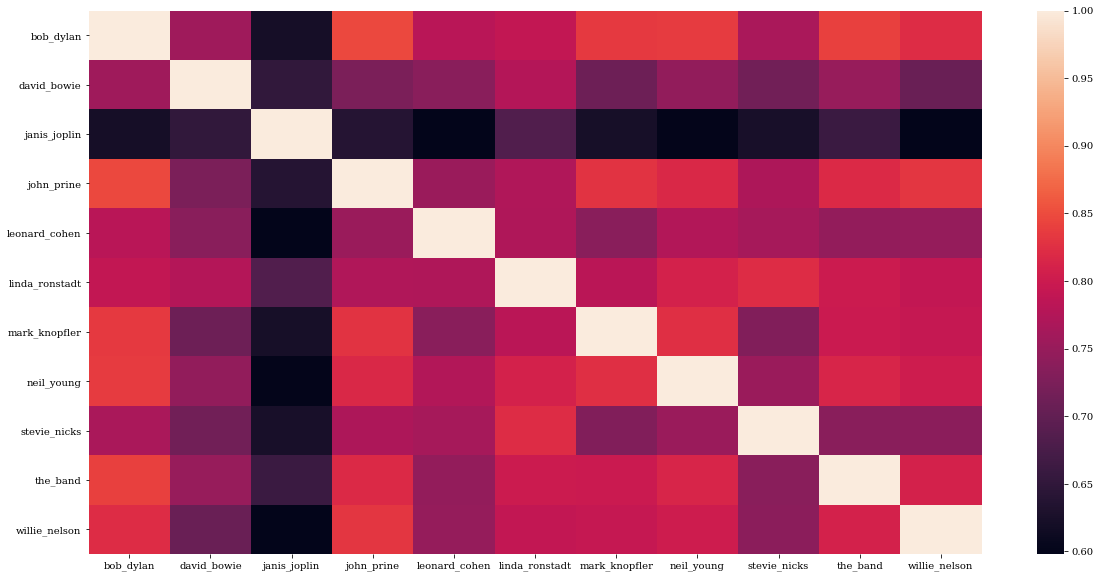

In [61]:
sns.heatmap(similarities)

<AxesSubplot:>

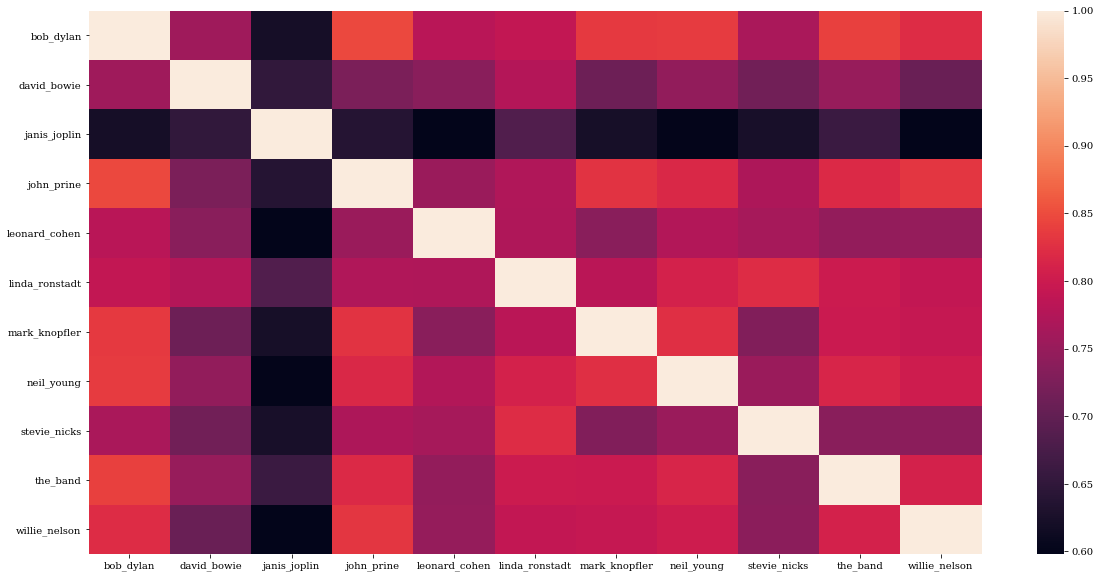

In [58]:
sns.heatmap(num_sims)

In [62]:
corr = similarities.corr()
corr

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
bob_dylan,1.000000,0.079332,-0.699792,0.690712,0.327613,0.236576,0.661308,0.671037,0.198327,0.635909,0.621011
david_bowie,0.079332,1.000000,-0.284018,-0.115862,0.106169,0.179474,-0.116820,0.069651,-0.036490,0.045047,-0.105974
janis_joplin,-0.699792,-0.284018,1.000000,-0.591476,-0.654997,-0.365916,-0.584579,-0.725054,-0.483570,-0.461438,-0.675535
john_prine,0.690712,-0.115862,-0.591476,1.000000,0.175820,0.137868,0.638159,0.574197,0.199556,0.536970,0.658209
leonard_cohen,0.327613,0.106169,-0.654997,0.175820,1.000000,0.225533,0.141433,0.347320,0.315993,0.110112,0.229704
linda_ronstadt,0.236576,0.179474,-0.365916,0.137868,0.225533,1.000000,0.211274,0.373030,0.499528,0.266282,0.285423
mark_knopfler,0.661308,-0.116820,-0.584579,0.638159,0.141433,0.211274,1.000000,0.633331,0.057925,0.483732,0.526122
neil_young,0.671037,0.069651,-0.725054,0.574197,0.347320,0.373030,0.633331,1.000000,0.195737,0.537269,0.553435
stevie_nicks,0.198327,-0.036490,-0.483570,0.199556,0.315993,0.499528,0.057925,0.195737,1.000000,0.023206,0.149435
the_band,0.635909,0.045047,-0.461438,0.536970,0.110112,0.266282,0.483732,0.537269,0.023206,1.000000,0.539977


<AxesSubplot:>

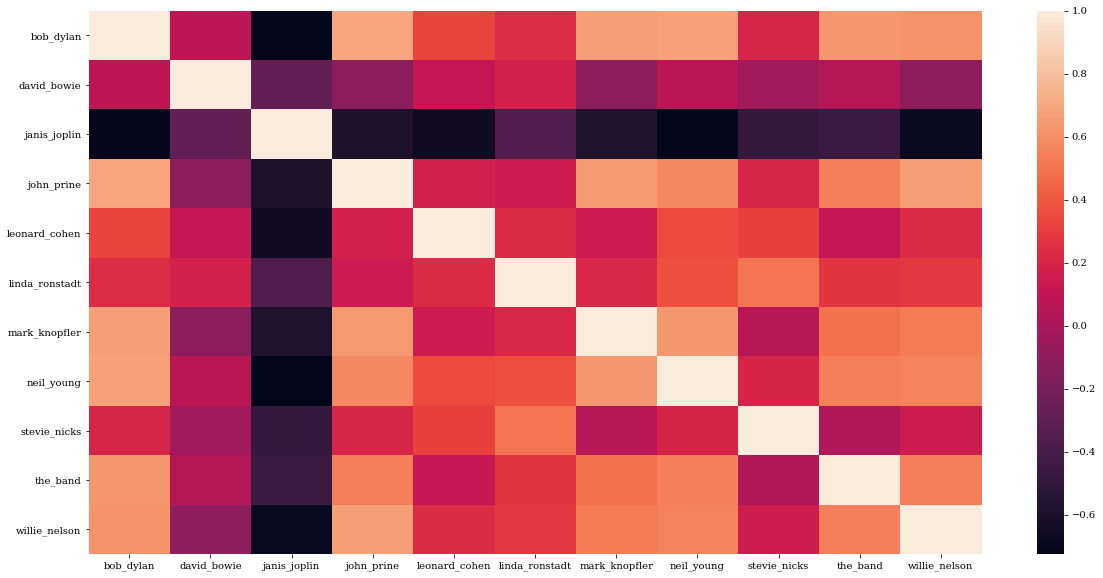

In [63]:
sns.heatmap(corr)

In [60]:
# plt.figure(figsize=(10, 10))
# corrplot(similarities.corr())

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

/var/folders/tb/j430qmhn16s6nsz08nf0y7y40000gn/T/ipykernel_4948/2924064695.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(similarities, dtype=np.bool))


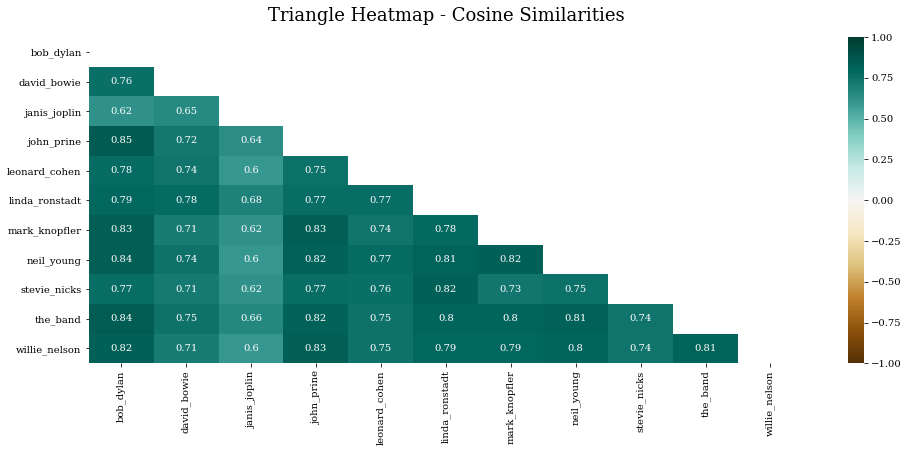

In [64]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(similarities, dtype=np.bool))
heatmap = sns.heatmap(similarities, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Heatmap - Cosine Similarities', fontdict={'fontsize':18}, pad=16);

/var/folders/tb/j430qmhn16s6nsz08nf0y7y40000gn/T/ipykernel_4948/959709135.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(similarities.corr(), dtype=np.bool))


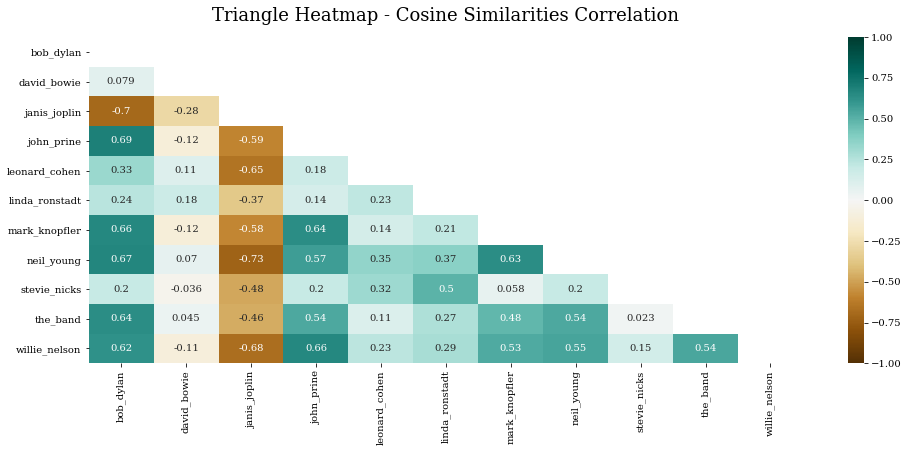

In [65]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(similarities.corr(), dtype=np.bool))
heatmap = sns.heatmap(similarities.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Heatmap - Cosine Similarities Correlation', fontdict={'fontsize':18}, pad=16);

/var/folders/tb/j430qmhn16s6nsz08nf0y7y40000gn/T/ipykernel_40566/1651041333.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(similarities, dtype=np.bool))


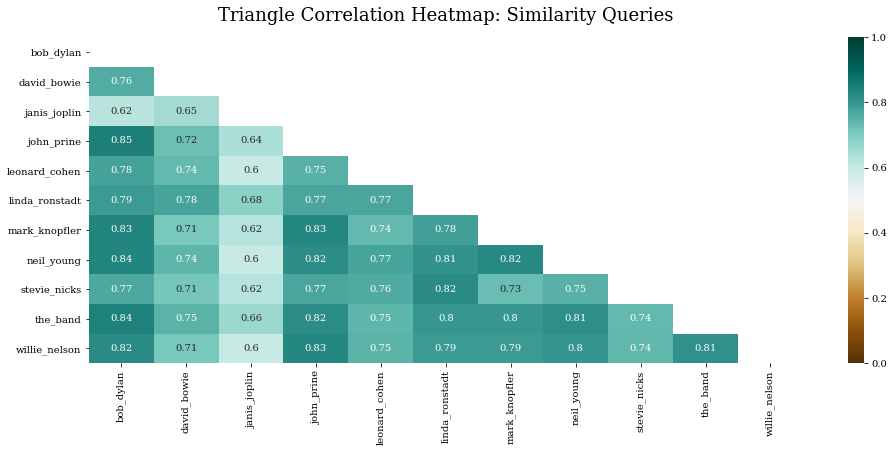

In [231]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(similarities, dtype=np.bool))
heatmap = sns.heatmap(similarities, mask=mask, vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap: Similarity Queries', fontdict={'fontsize':18}, pad=16);